# Circunomics Assessment Report

## Results Summary and Discussion

A presentation of the findings and analysis of eager Circunomics prospect - **Liam Mathers**




### General Assumptions
- Battery Model
    - In general assuming the complex electrochemical reactions to be able to be decomposed in the Resistor-Capacitor interactions is a great simplification. However, using a second order ECM such as the one demonstrated is generally robust enough to generate a relatively accurate model of current and relaxation response for a majority of purposes.
- Curve Fitting
    - Using SciPy's curve fitting optimization process for the parameters assumes that the ECM parameters can be achieved by fitting said model to the experimental data. If the model is correct, this is generally a fine assumption. Additionally, it dictates any discrepencies between the model and data are either from noise or limiations on the model itself.
- Independent Grouping
    - Much of my analysis dependent on seperating groups of interest and analyzing seperately. For things like parameterization, I did not take into account any dependencies and/or relationships these groups have with eachother
- SOC/OCV Relationship
    - While I did model a non-linear SOC/OCV relationship (which is the majority case), this relationship can have large variation when considering other factors: temperature, aging, etc.

## Task 1
* Import the .csv file from the folder. This file consists of initial characterization batterie( Tests performed from 100% to 0%). what is the capacity of the batterie?
* Analyse the data in detail and extract the parameters of li ion cell equivalant circuit model(ECM). (Assume a 2nd order equivalant circuit model). Hint: try to use current interruption technique to extract the parameters.
* Extract ocv values of the cell w.r.t SoC and plot the curve.
* Find the other cell parameters and plot them w.r.t the SoC. hint: You can use any non linear optimization methods to parametrize the ECM model. i.e. scipy library, curve_fit etc.
* Plot w.r.t time V_actual(mesurement from the csv file) & V_simulated (voltage response to the current from the csv file) after building the model with the extracted parameters.
* Plot error with respect to time
* Plot the error distribution.


*************

I did my best to comment my code for readability but I will do my best to expand on results here as well

***


**Import the .csv file from the folder. This file consists of initial characterization batterie( Tests performed from 100% to 0%). what is the capacity of the batterie?**

1. I imported the file after visually determining what would be the best deliminators. Clearly different categories were seperated with ; and column breaks represented decimals.
2. I then found the time between each measurement(in hours) and multiplied that by Amps of current at each measurement. Because it was a purely discharge test, all current was going towards discharge and because it went from 100% to 0%, the total sum represented the entire capacity. 

Resulting in a capacity of 56.81 Ah






***Analyse the data in detail and extract the parameters of li ion cell equivalant circuit model(ECM). (Assume a 2nd order equivalant circuit model). Hint: try to use current interruption technique to extract the parameters.***

***Extract ocv values of the cell w.r.t SoC and plot the curve.***

1. The data followed a cyclical pattern of discharge and pause. This allowed me to characterize two distinct groups, a discharge group where Voltage and SOC was changing and a pause group where SOC was constant but voltage changed.
2. Approximating the no-load voltages during the paused phases as OCV, I could correlate them with the respective SOC allowing me to produce the following graph.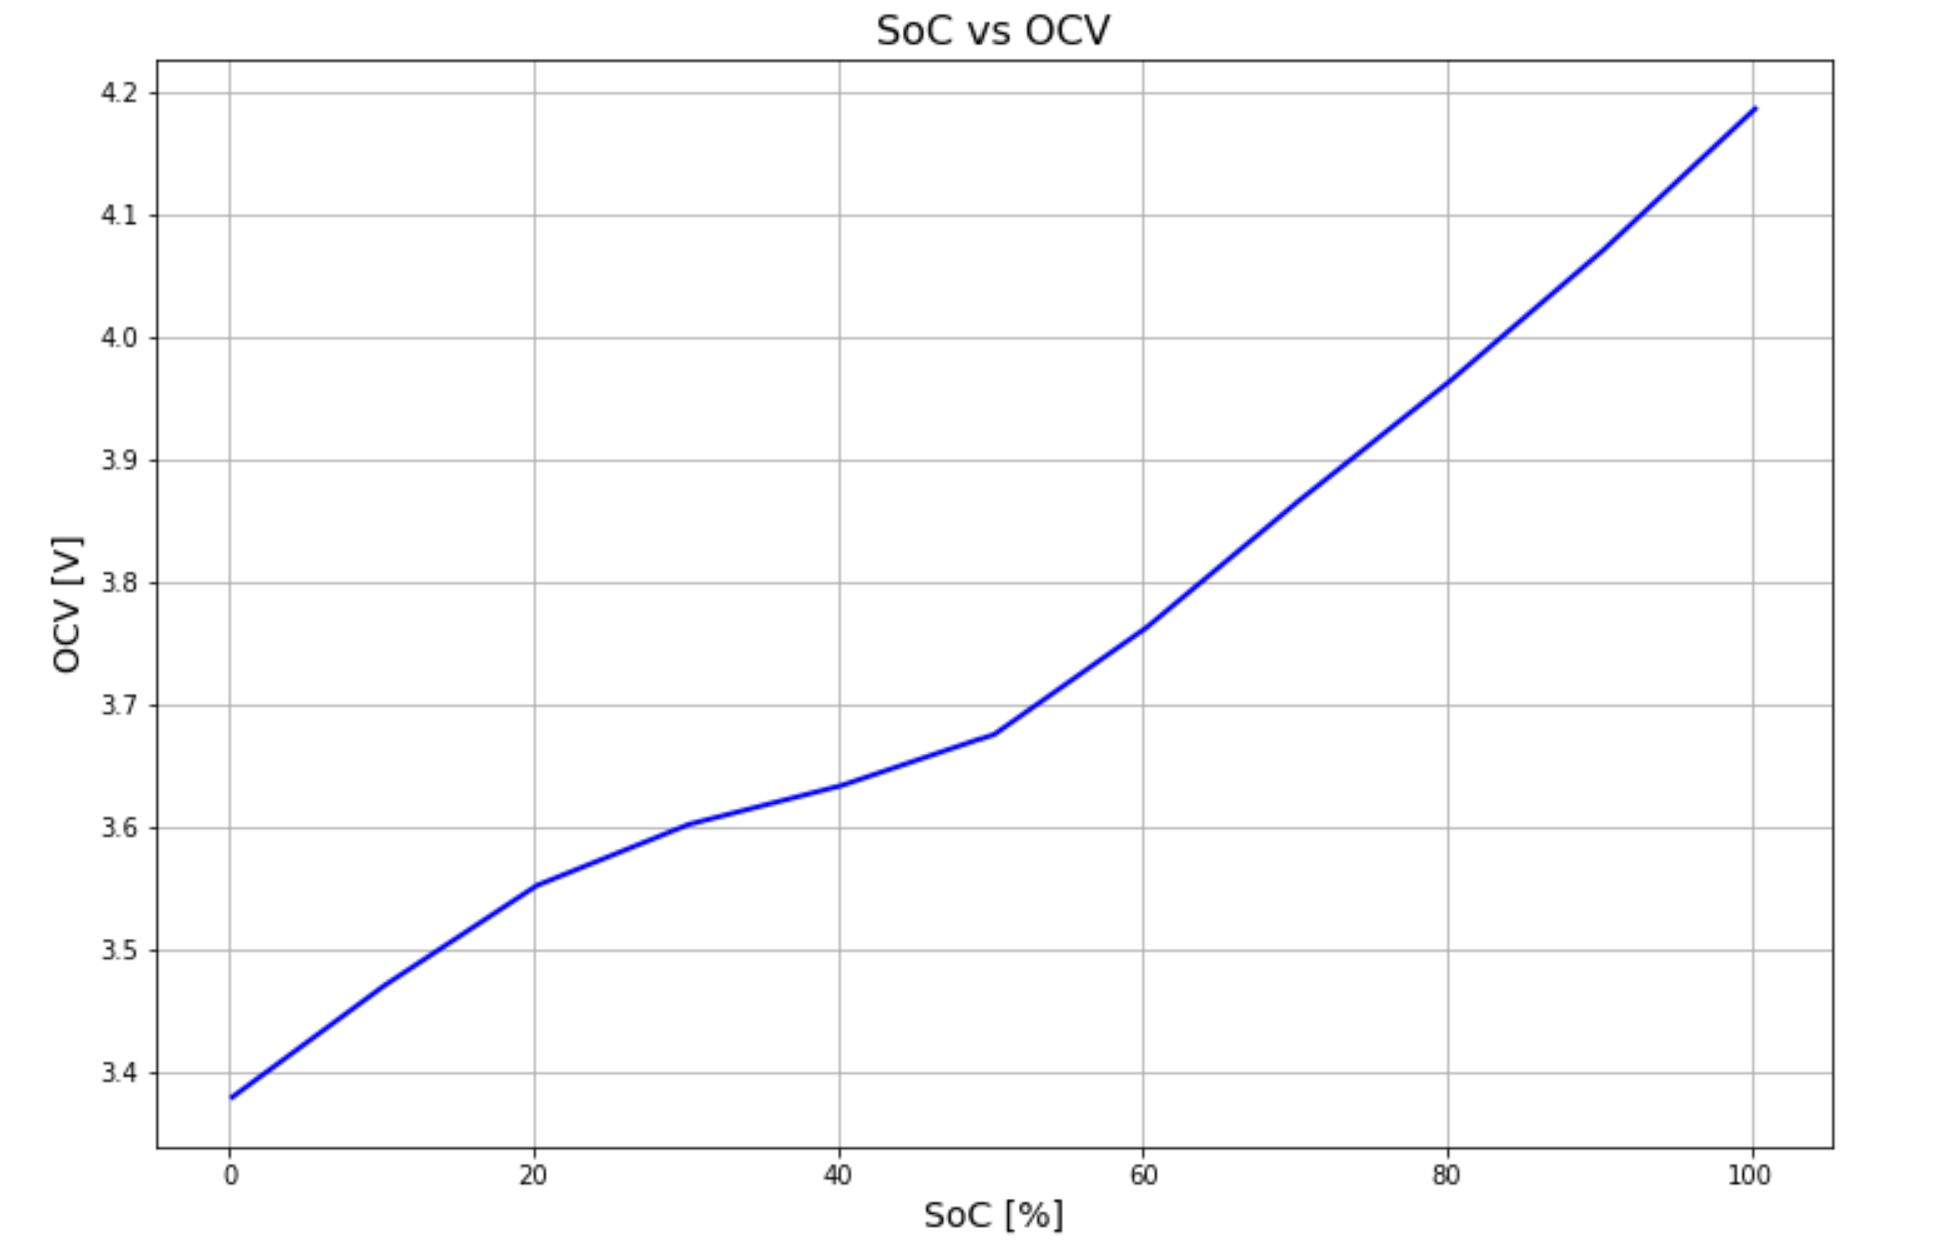



- This accurately produces a nonlinear SOC-OCV relationship. The values between each datapoint were later interpolated.

**Find the other cell parameters and plot them w.r.t the SoC. hint: You can use any non linear optimization methods to parametrize the ECM model. i.e. scipy library, curve_fit etc.**

The main governing equation is two RC network that models the resistance and relaxation effects within the battery

$V = R0 + R1 \cdot (1 - \exp(-\frac{t}{R1 \cdot C1})) + R2 \cdot (1 - \exp(-\frac{t}{R2 \cdot C2}))$

This was used in conjunction with a few other functions that produced the following process:

Start at paused phase
1. Find the SOC
2. Extract the respective ECM parameters (R0,R1,C1,R2,C2) 
3. Simulate the voltage by inputting some time series (current = 0)
4. ID the last voltage


Start the discharge phase
1. SOC constant at pause so take last voltage
2. read current and time values to identify total DCH for this cycle
3. Use nominal capacity to determine reduction in SOC
4. Use final SOC to find final voltage
5. Interpolate between start v and end v for continuous voltage

**repeat cycle


Functions defined:

**Curve_fitting** - found the parameters for each pause phase. This is what allowed me to graph parameters w.r.t. SOC

**cap_loss** - estimate SOC loss during each DCH phase

**findparam** - determined best fitting parameters for the current SOC

**findsoc** - correlates ocv into soc

**findocv** - correlates soc into ocv

**vsim** - feeds the current time/voltage/current ranges into the model to simulate DCH response or relaxtion. Generating continuous voltage response

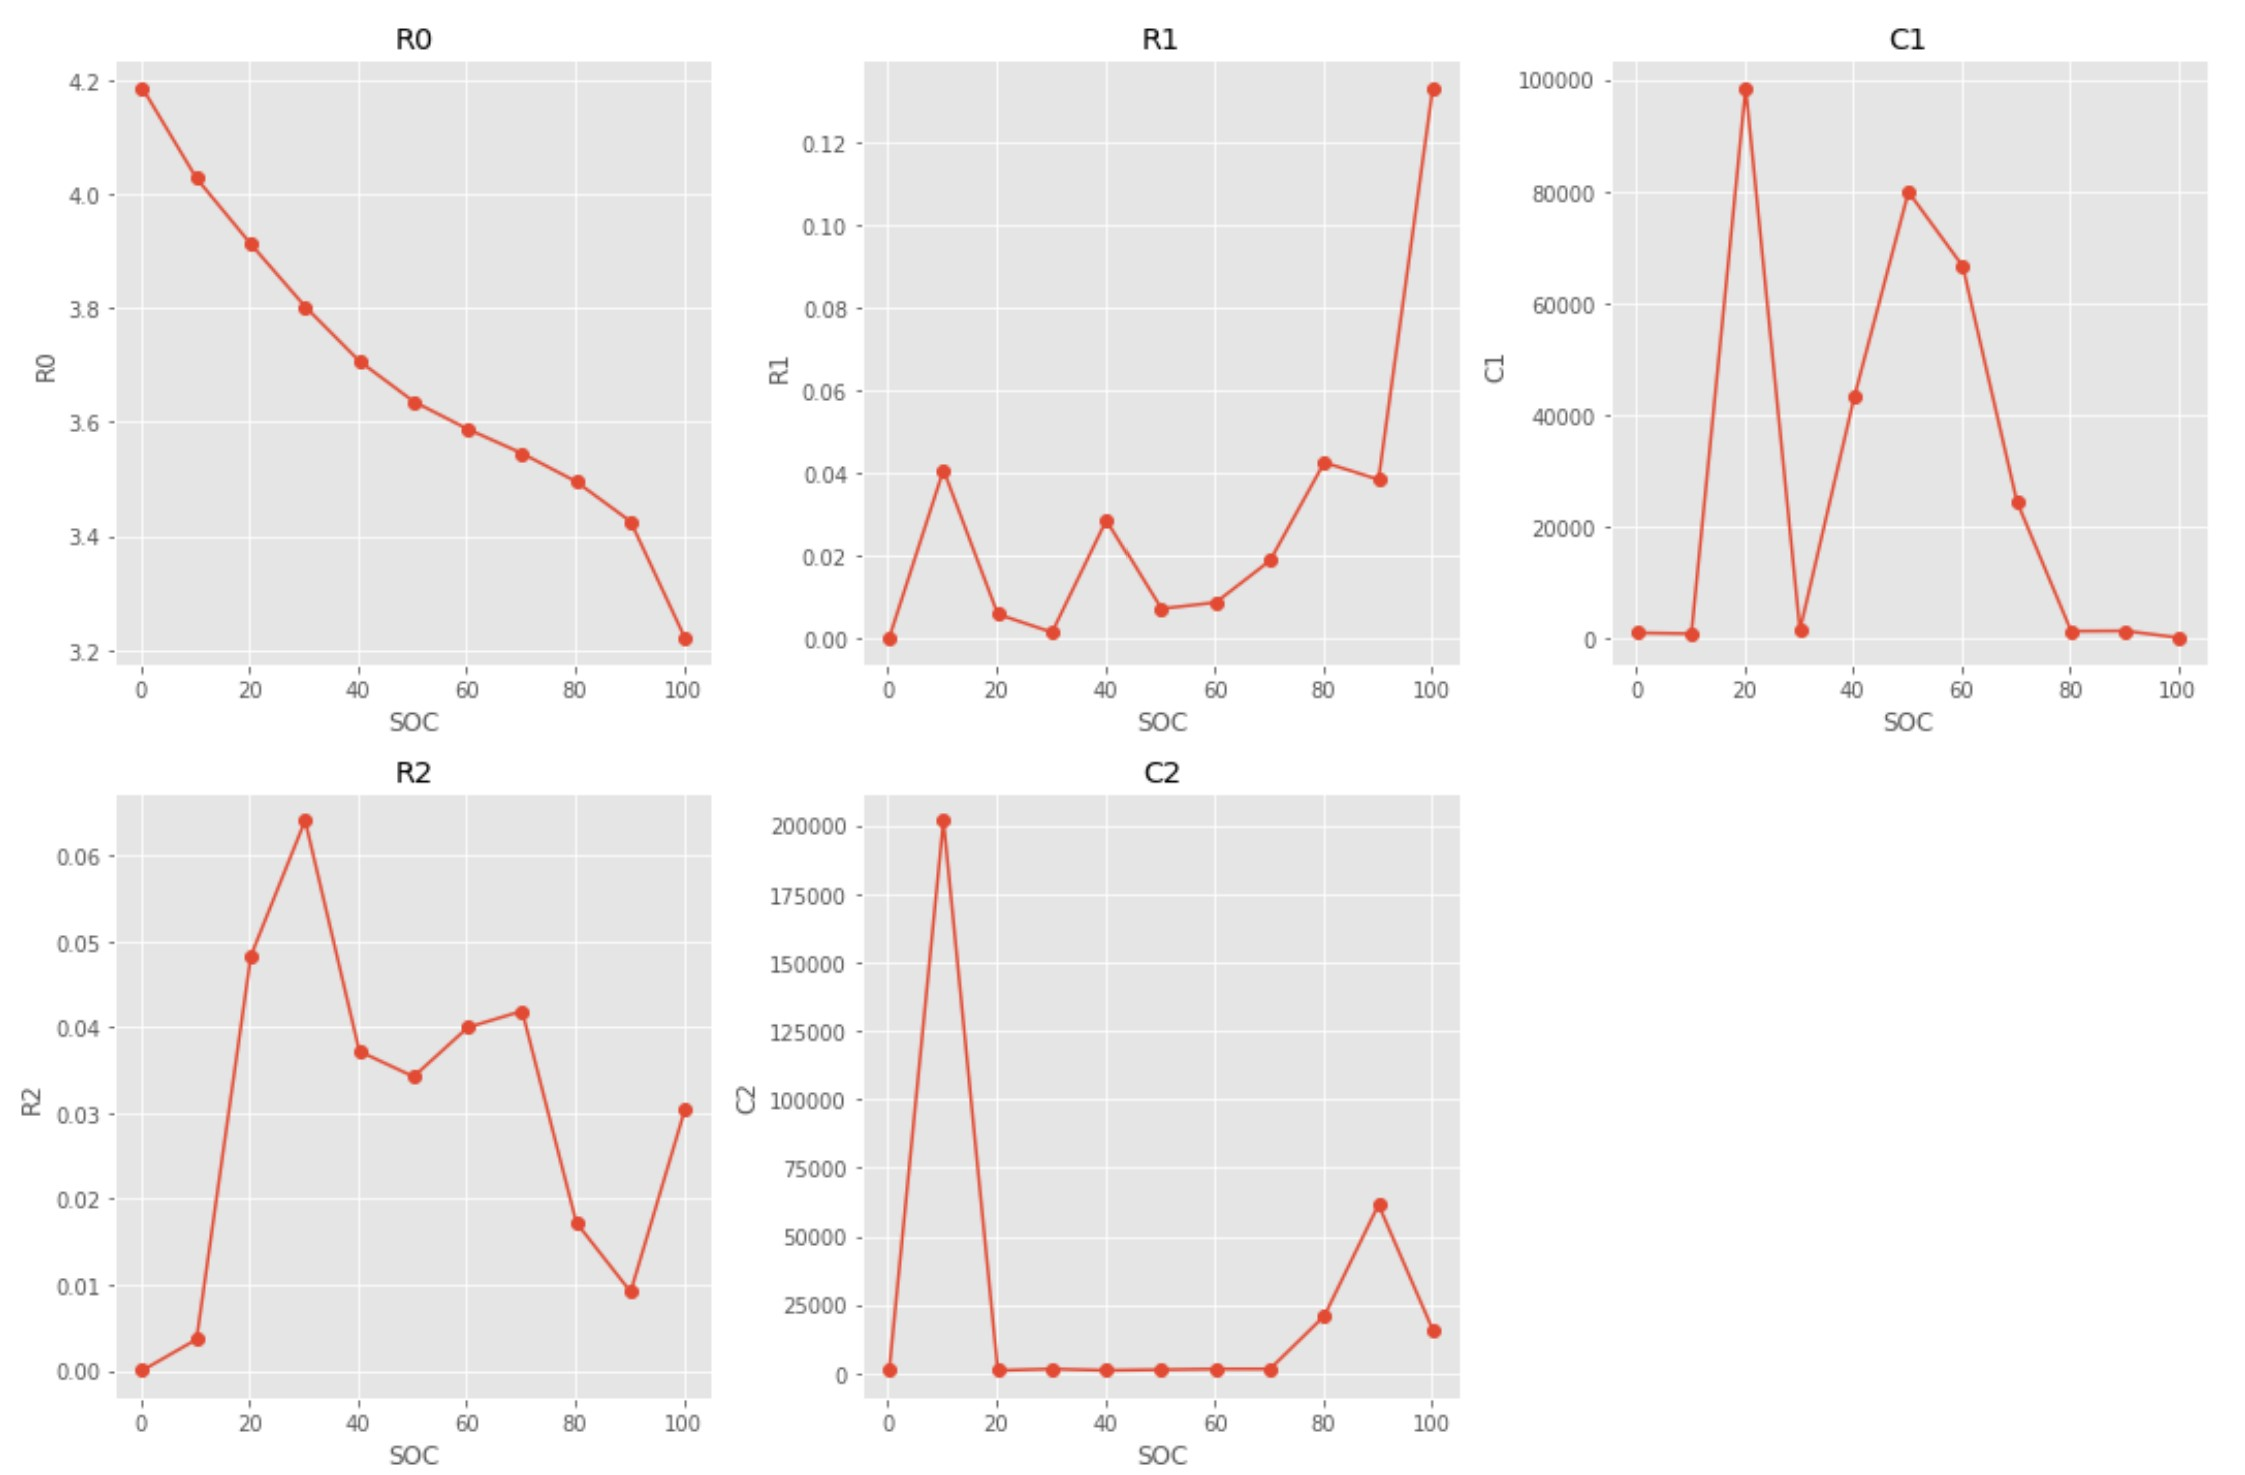
- Besides R0, there are no discernible patterns within the parameters wrt SOC

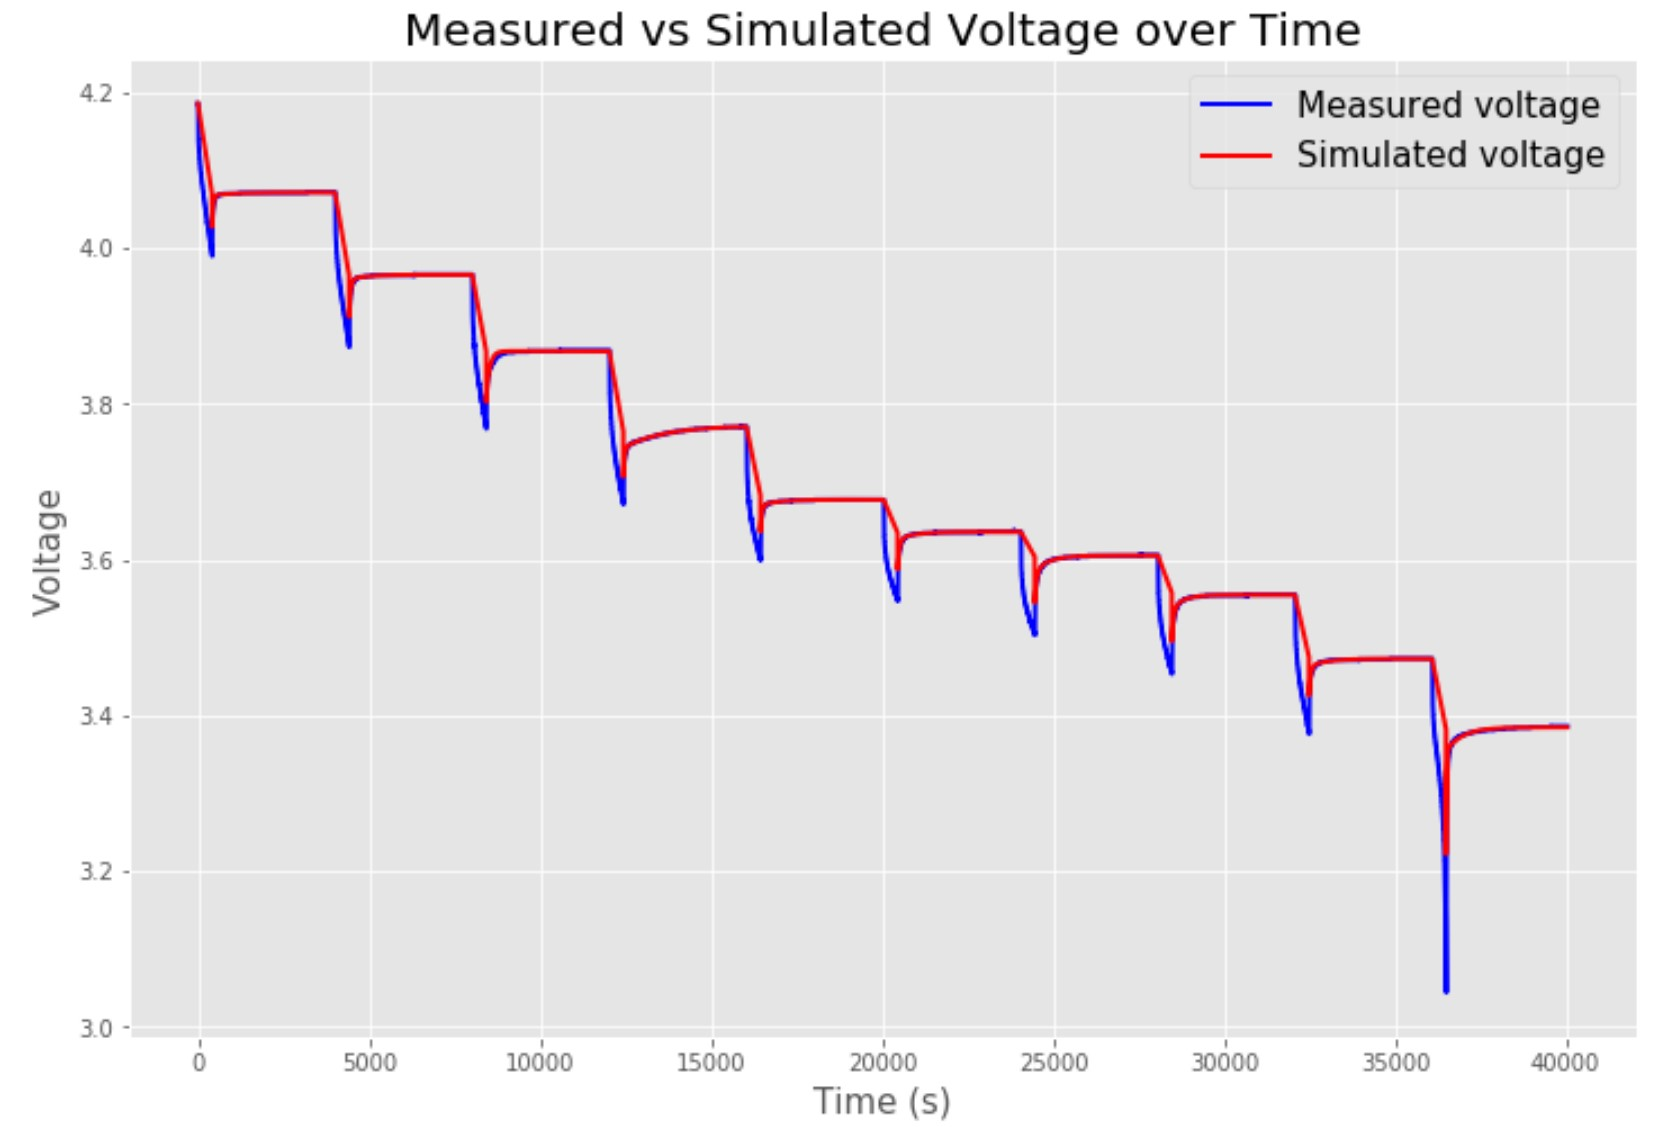
- The model looks to be more accurate during relaxation and does not fully cover the discharge phases. Lets check the error plots!

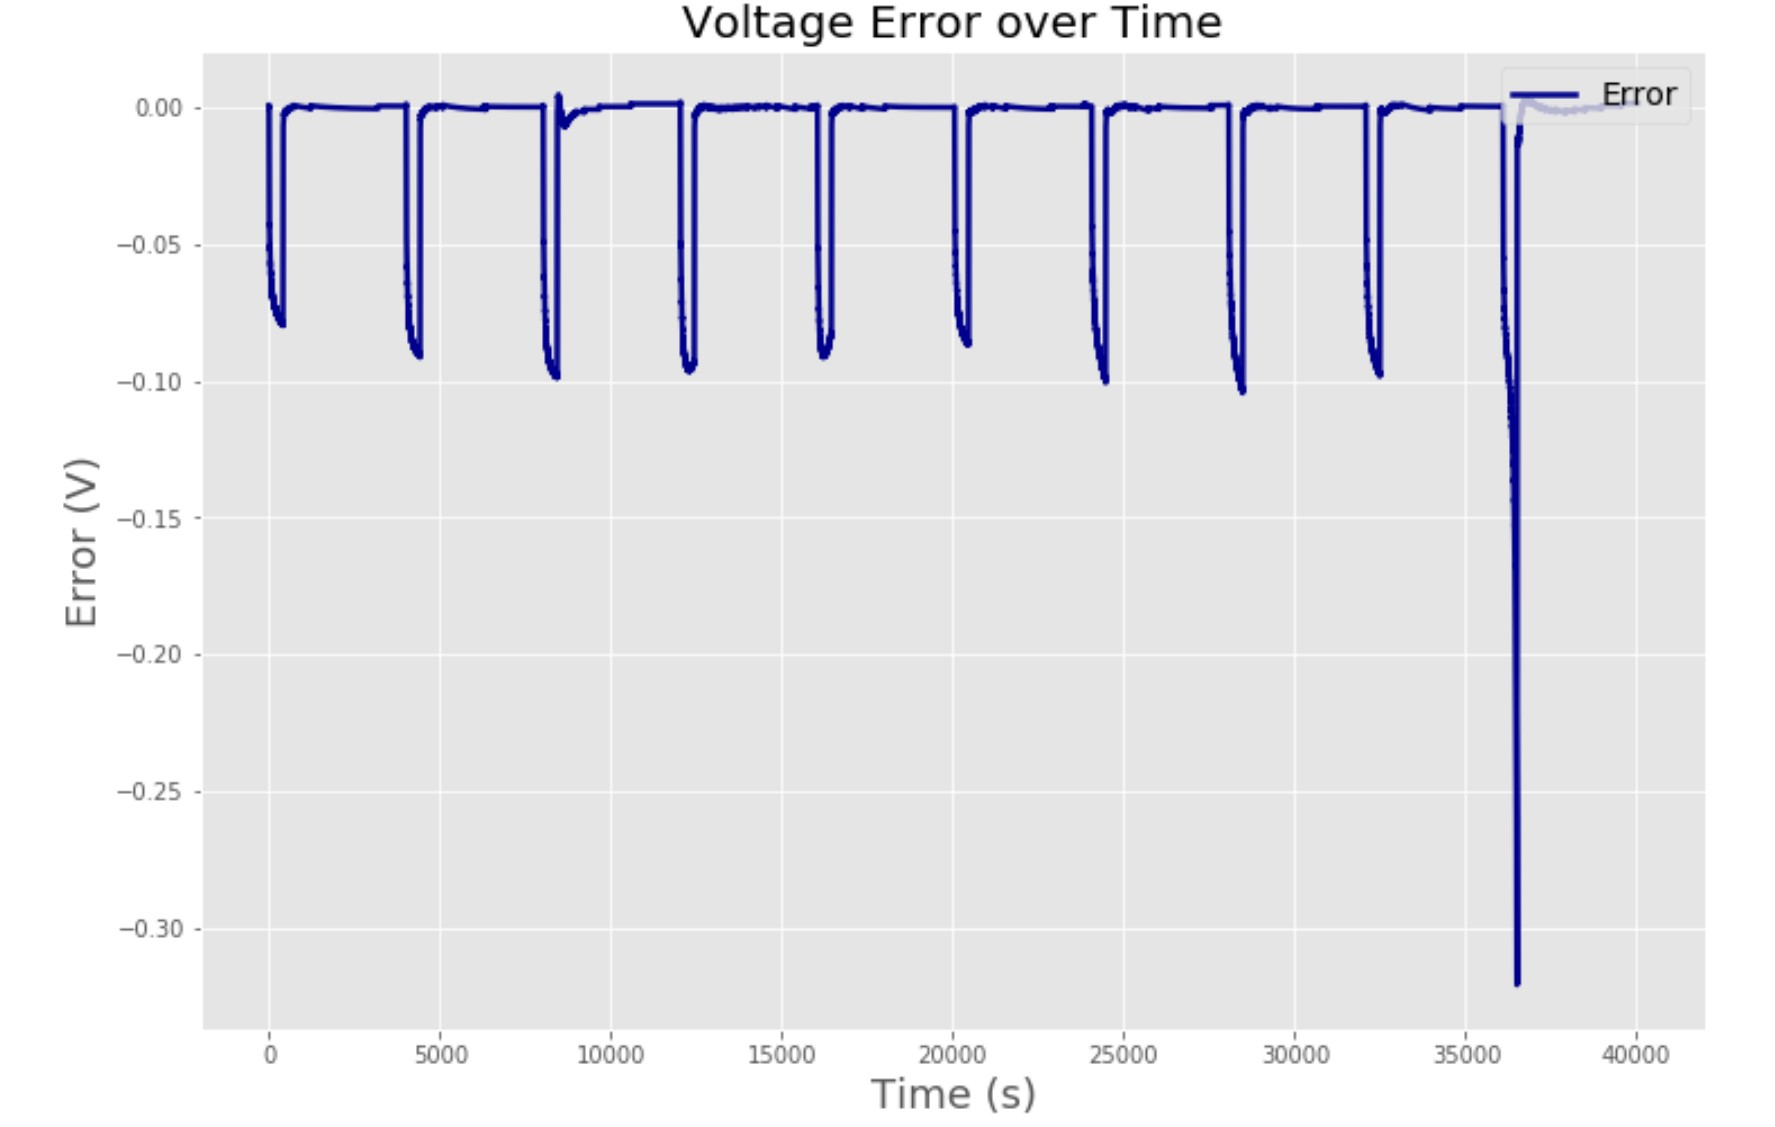

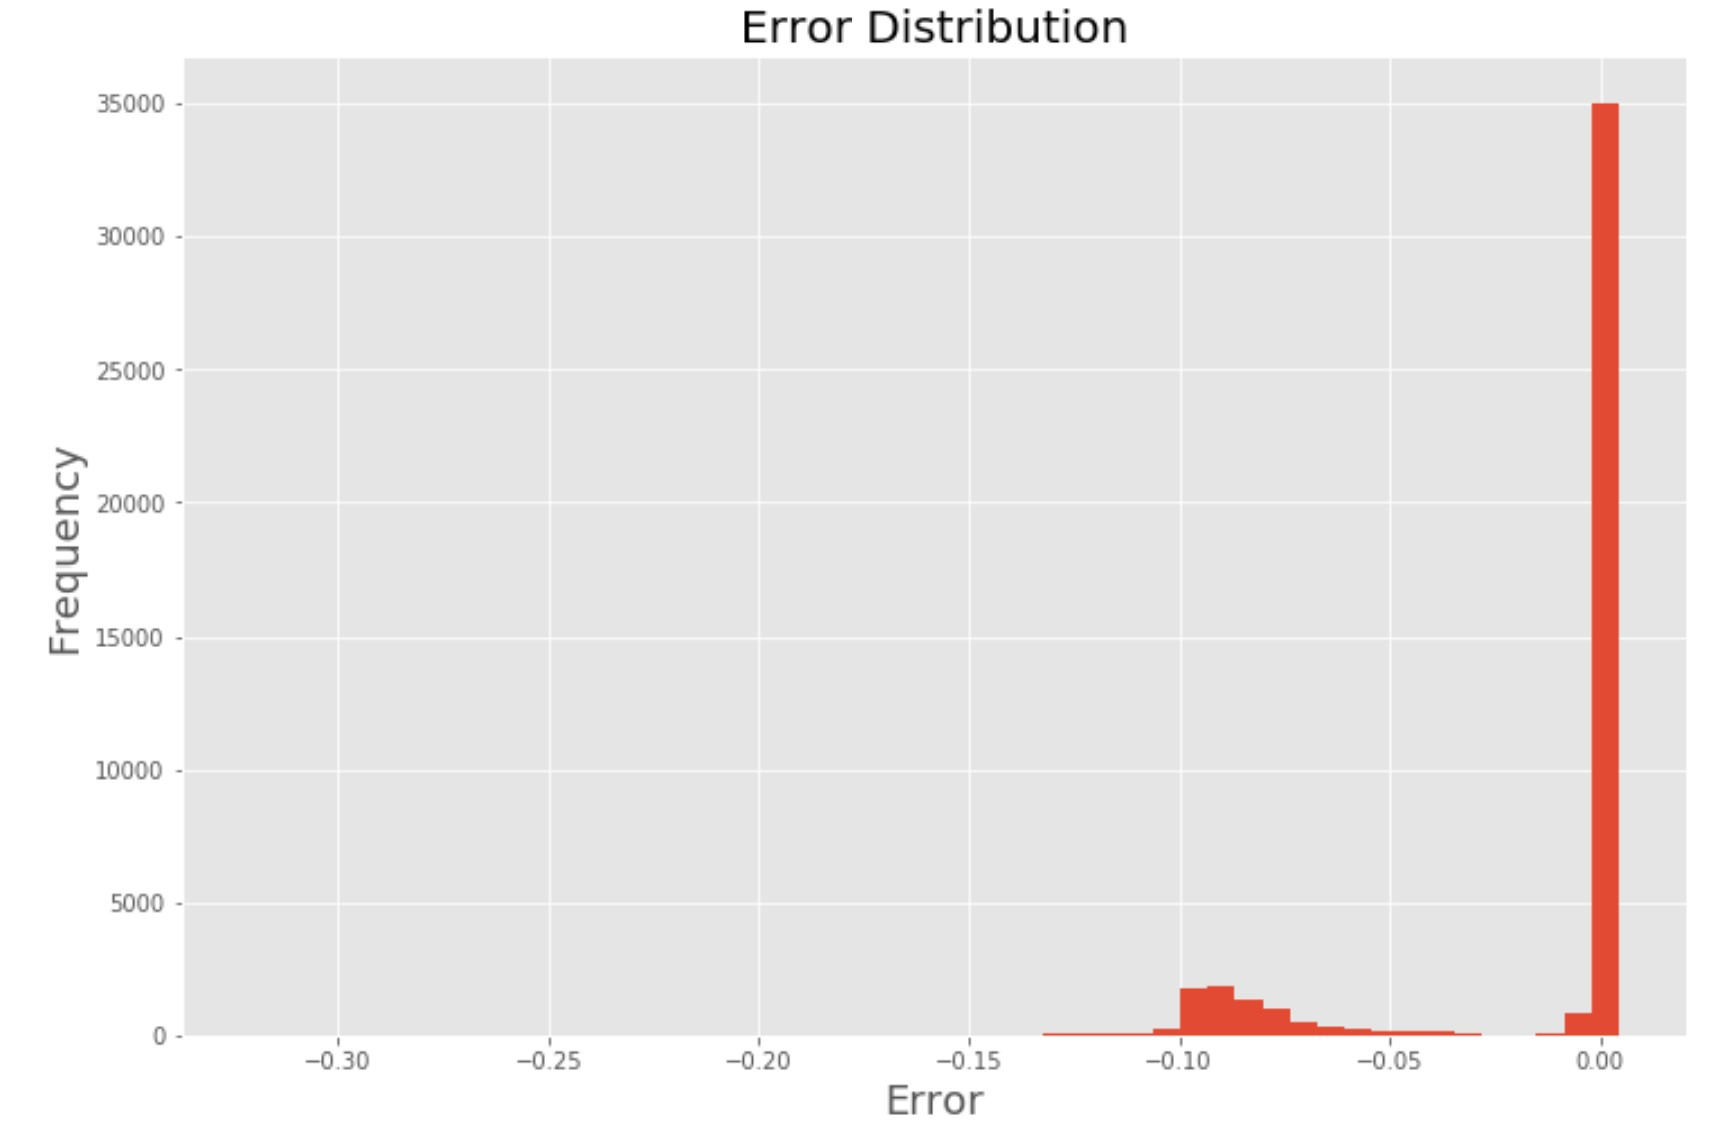

- It is now clear to see that at each discharge phase there is a spike in the error plots. These are relatively low proportion of the measurements and thus result in low frequency of error. Additionally the model seems to self correct to accurate relaxation voltage, meaning the discharge error does not propogate and lead to greater and greater error.

## Task 2

- Import the .xls file from the folder describing the cycling aging charge data at different timeperiods over the life.
- Data preprocessing shall be done. Look for outliers, missing values if any. Add any additional attribtes for the sake of restructuring the data.
- Compute the SoC (build a function in python or matlab to compute the soc). Hint: take initial soc from the soc-ocv curve developed in the previous task.
- Calculate the SoH of the battery for every charge cycle and plot the Charge voltage w.r.t the Capacity. Hint: Overlap all charge curves in a single plot to see the ageing behaviour.

**Import the .xls file from the folder describing the cycling aging charge data at different timeperiods over the life.
Data preprocessing shall be done. Look for outliers, missing values if any. Add any additional attribtes for the sake of restructuring the data.**

I read in the data and immediately graphed it to get a visual understanding of the charging cycles. Right away there was clear disorganization with the internal time series describing the voltage and current measurements. When I reordered the data I also check for missing values, NaNs, and outliers using an Inter-Quartile Range.

**Raw**
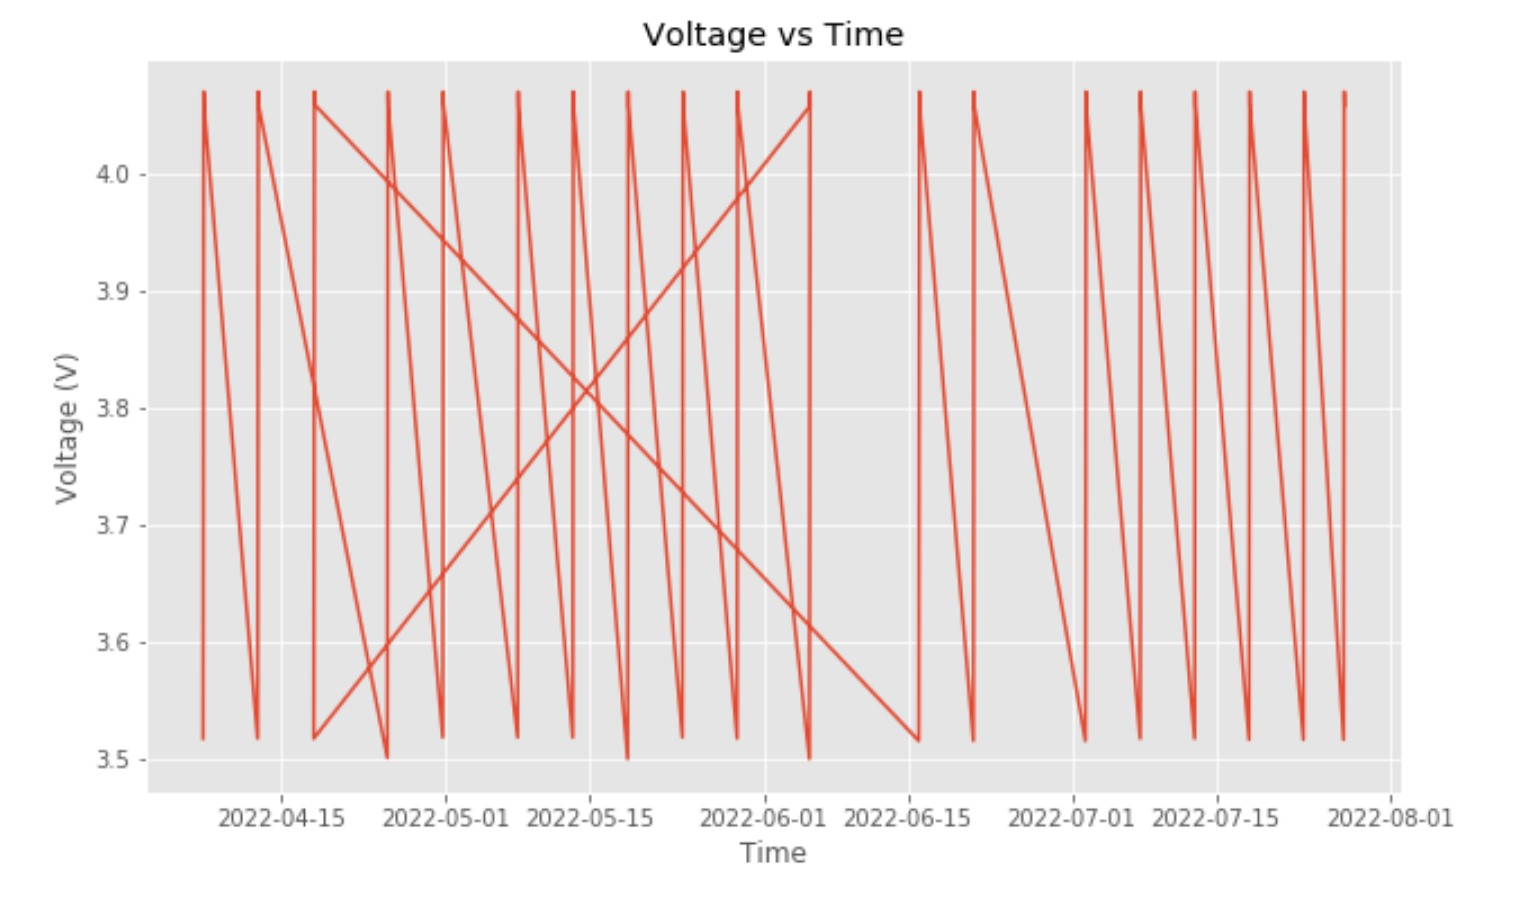

**Pre-Processed**

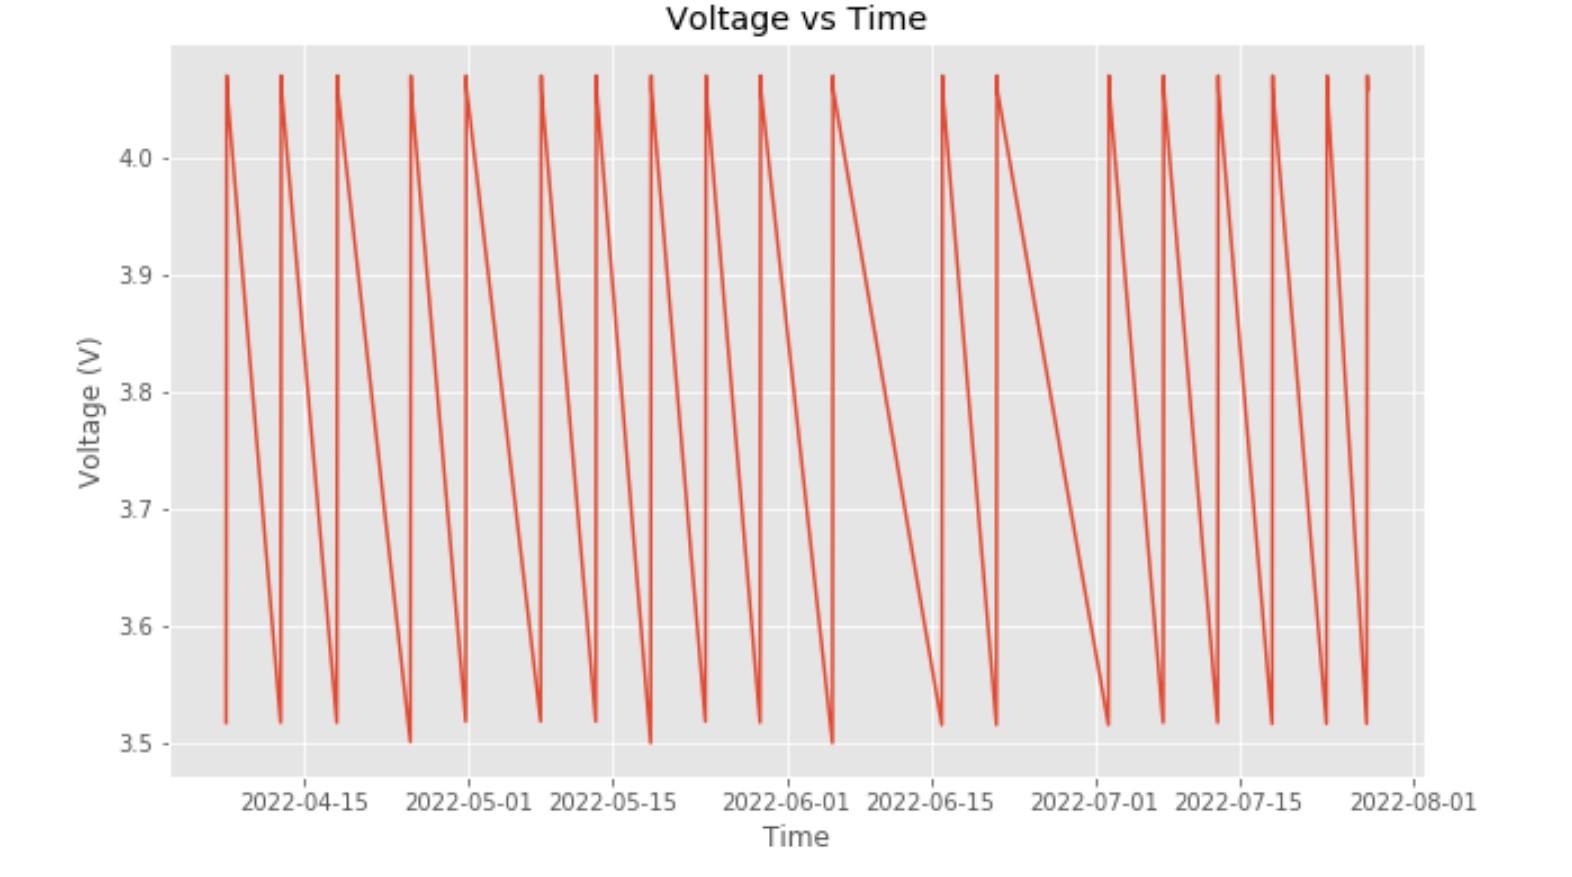

To get an even stronger understanding of the data, I graphed the first cycle of all measurements wrt time:

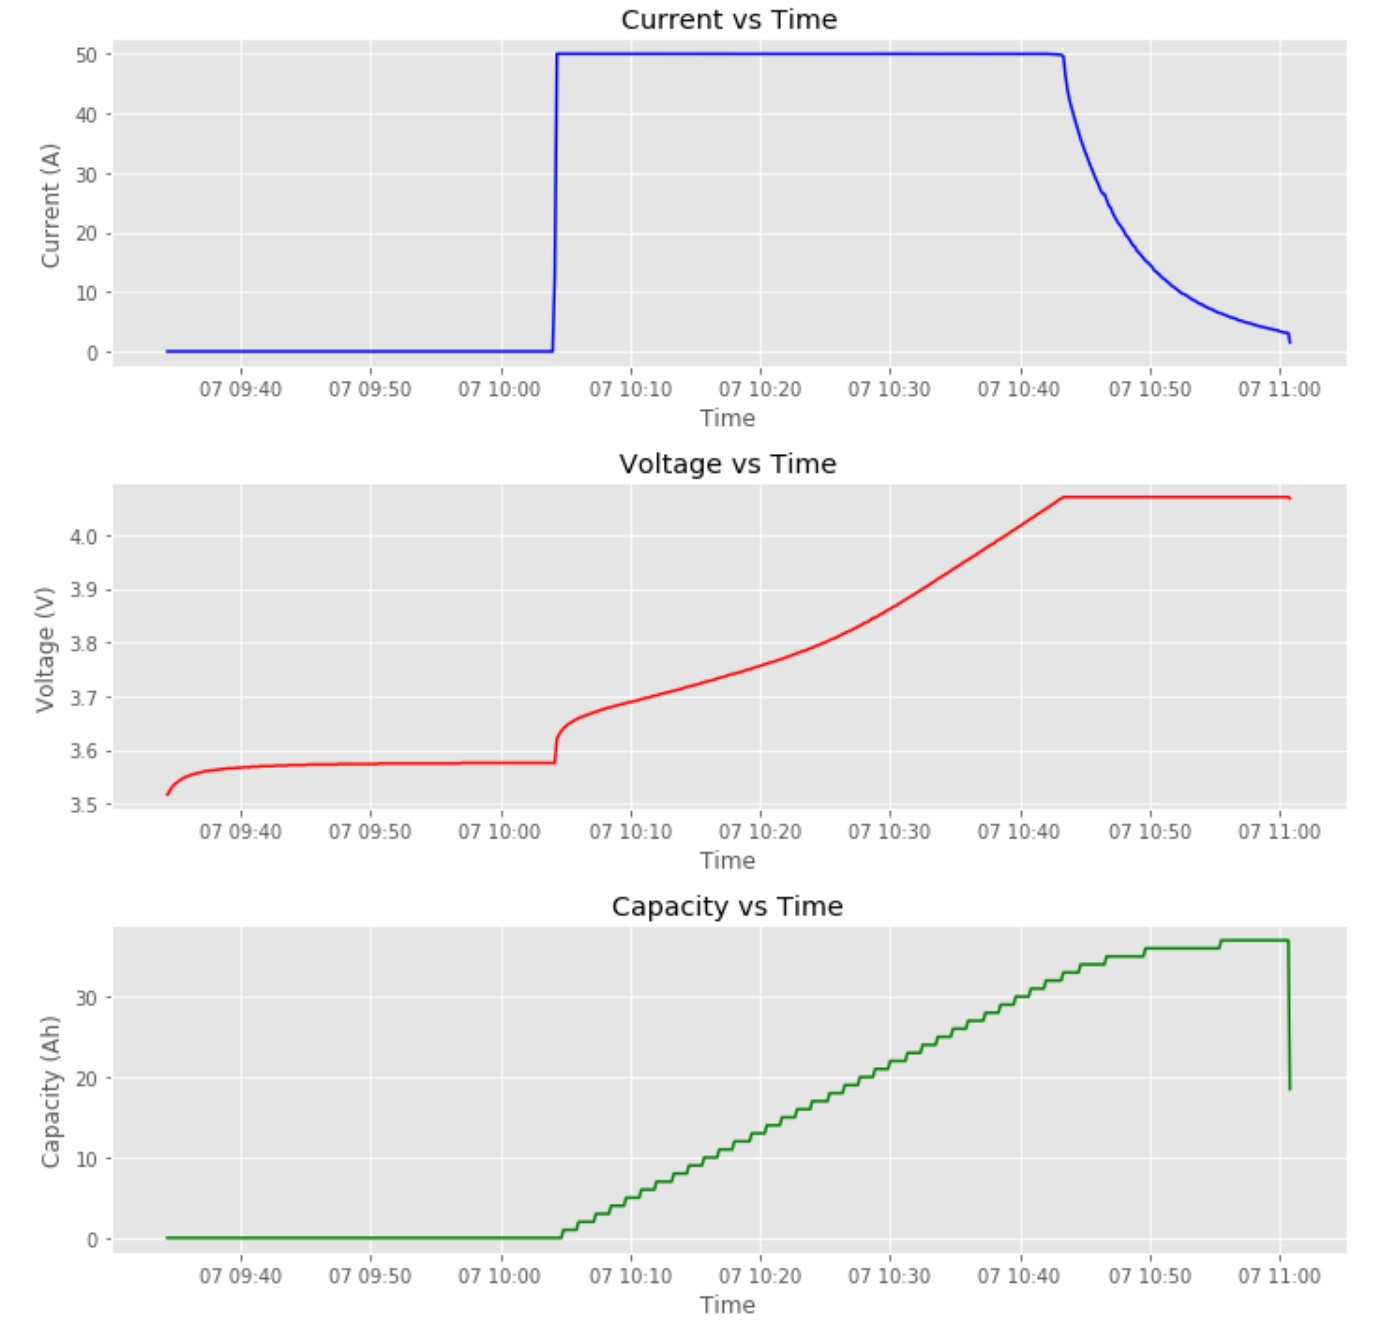

**Compute the SoC (build a function in python or matlab to compute the soc). Hint: take initial soc from the soc-ocv curve developed in the previous task.**

I used a similar method of calculating SOC from task 1. I assumed the capacity of the battery to be the same as the battery in task 1.

- measuring time intervals [hrs]
- measuring average current at each measurement
- calculating total charge for each pulse
- soc = initial_soc + total_charge_passed / total_capacity (56.81)

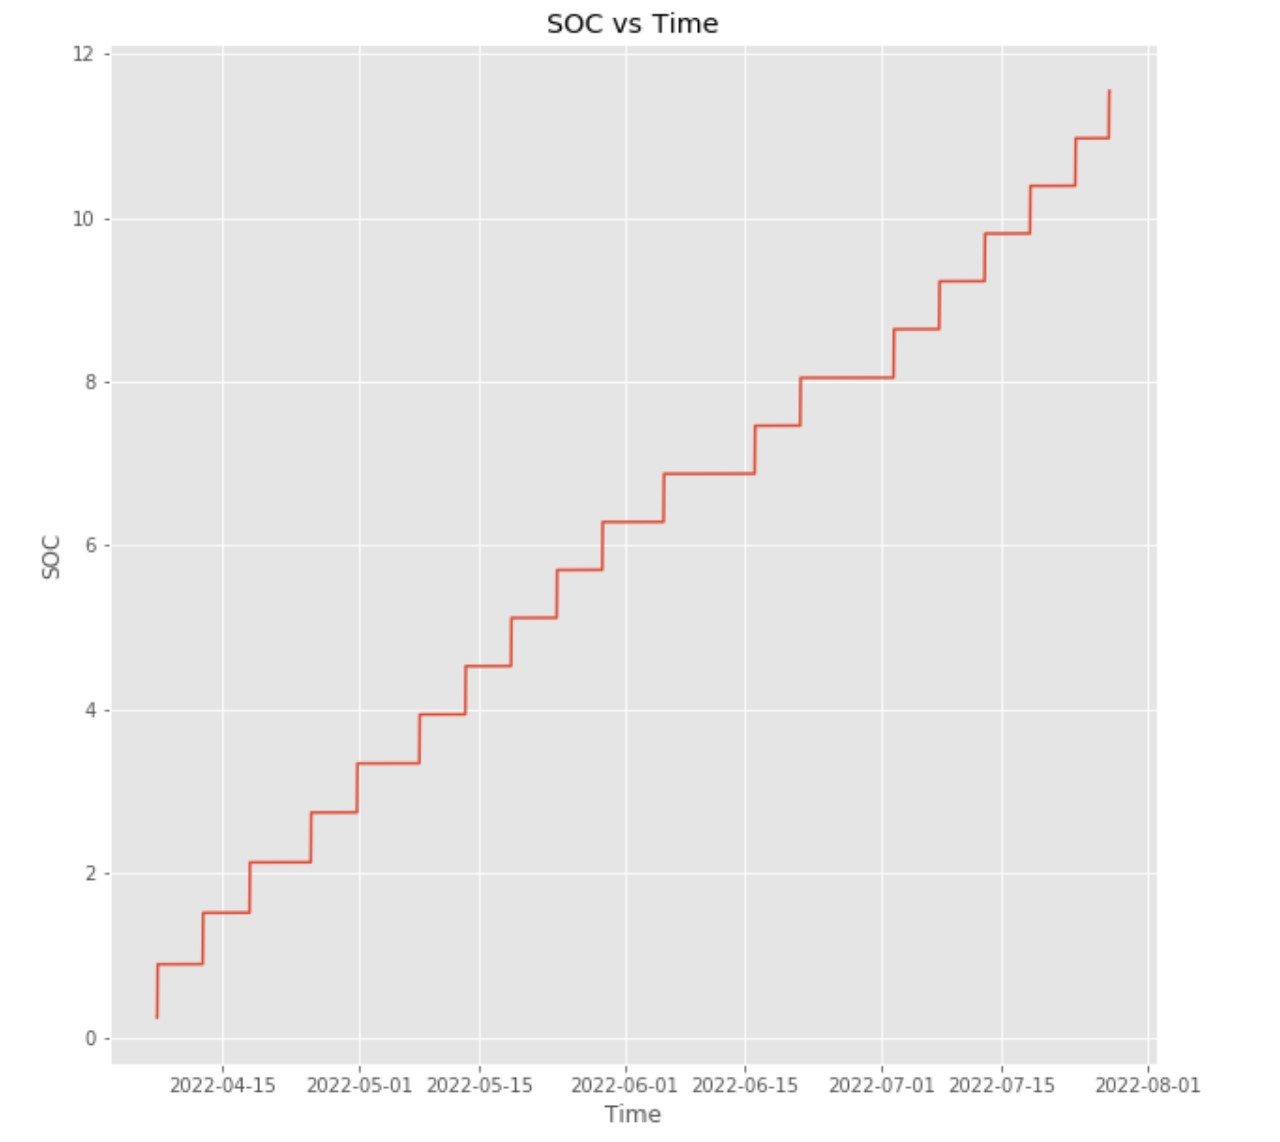


- After visualizing the step response of SOC, I wanted to overlay the current input to ensure the increase in SOC was occuring during charge pulses:


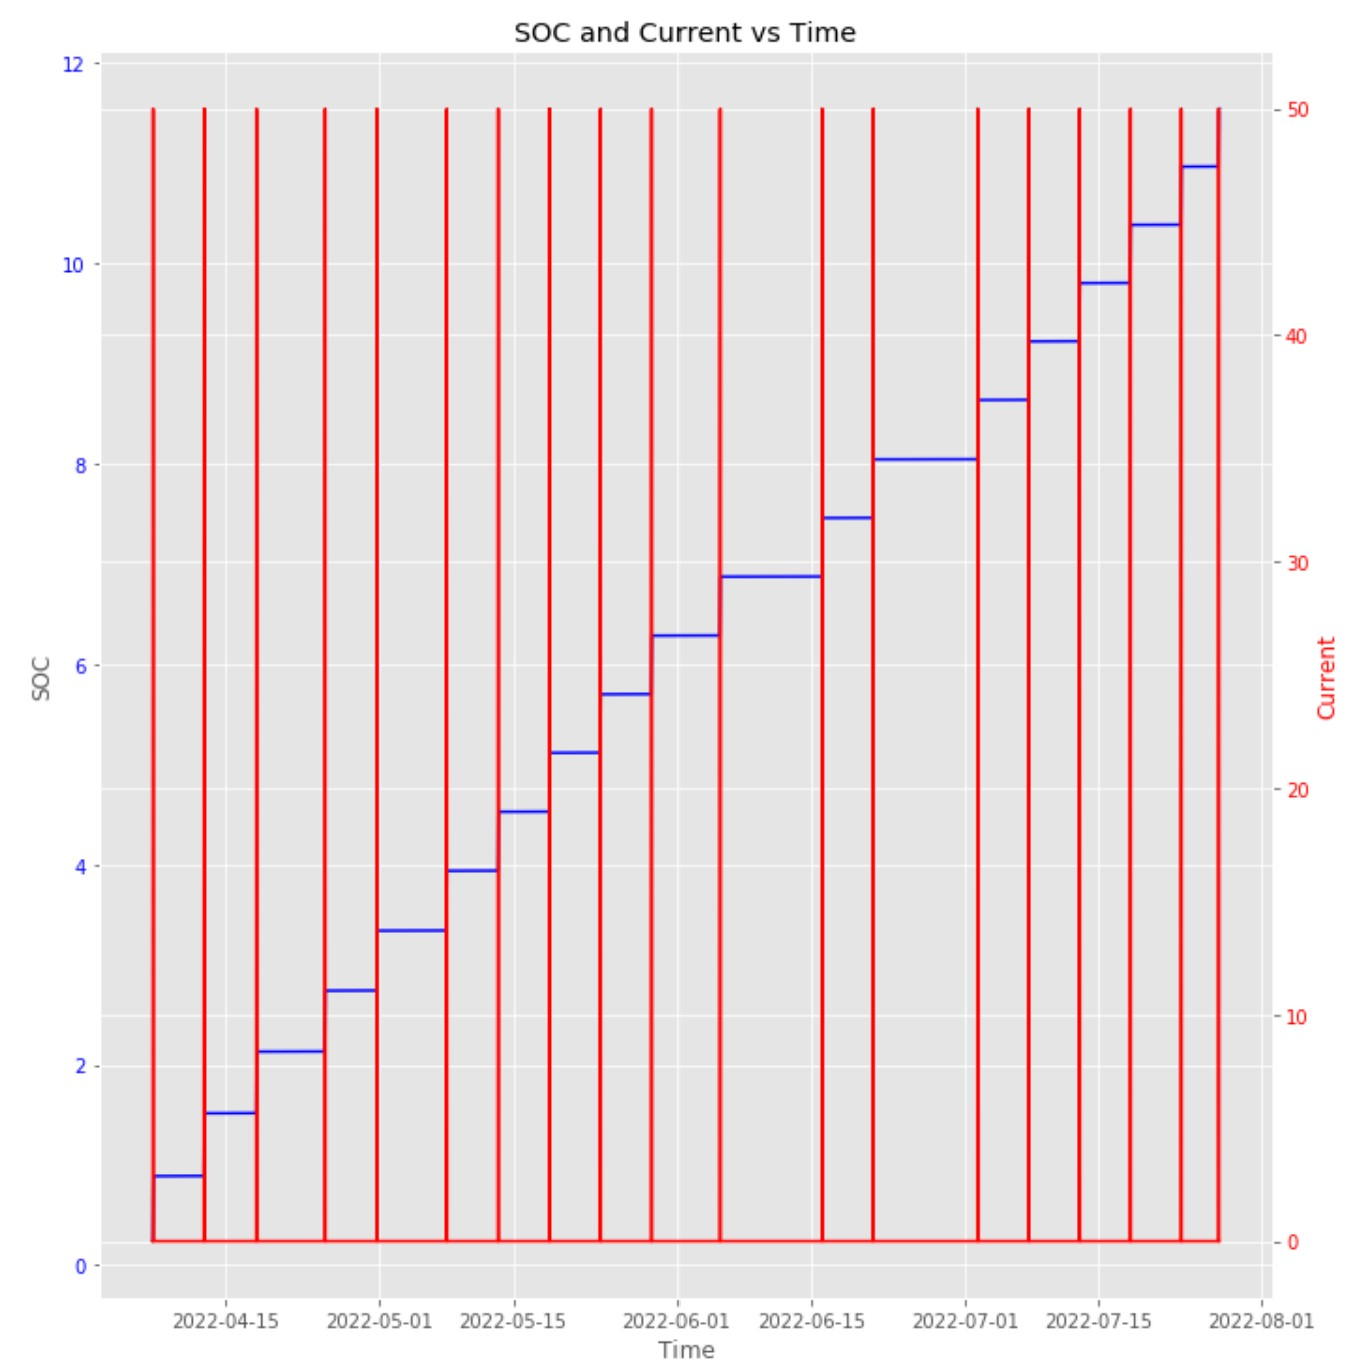

**Calculate the SoH of the battery for every charge cycle and plot the Charge voltage w.r.t the Capacity.**
    
 1. I first added a true/false 'cycle_change' column to determine when charge or phase was active
 2. This allowing me to cummulatively add each one to assign each cycle a 'cycle number'
 3. I could then group and iterate by cycle number to derive time/voltage/capacity ranges
 4. Because there was no context to the internal "capacity" column, I also decided to calculate and plot my own capacity calculations - completed with the same methods from previous tasks
 
 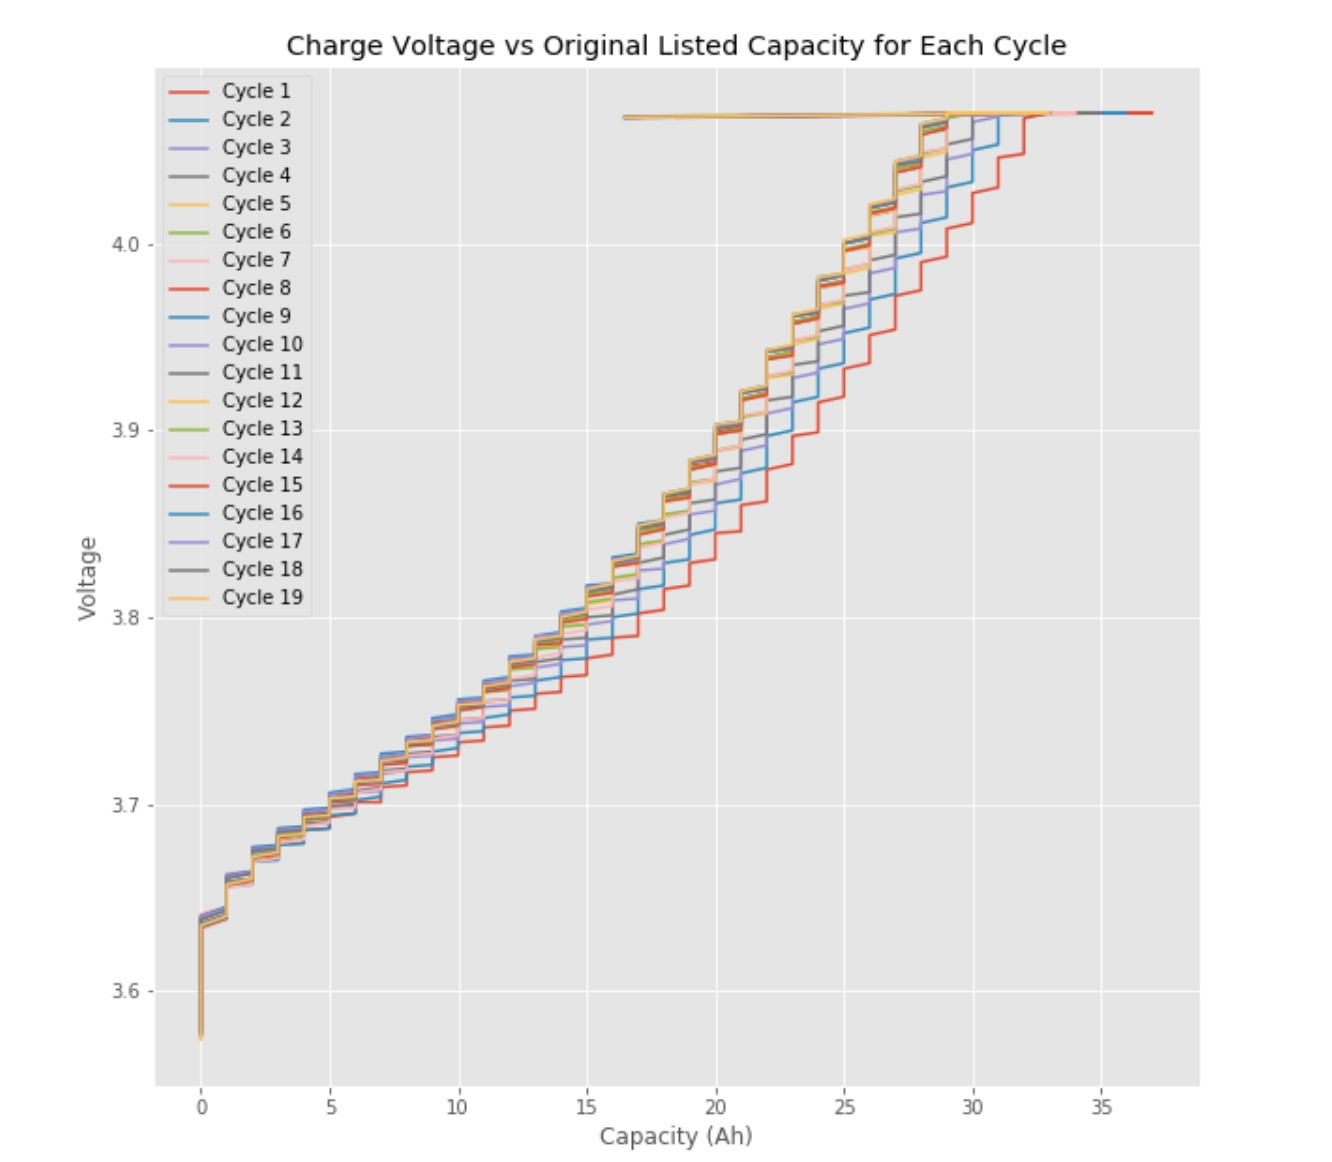
 
 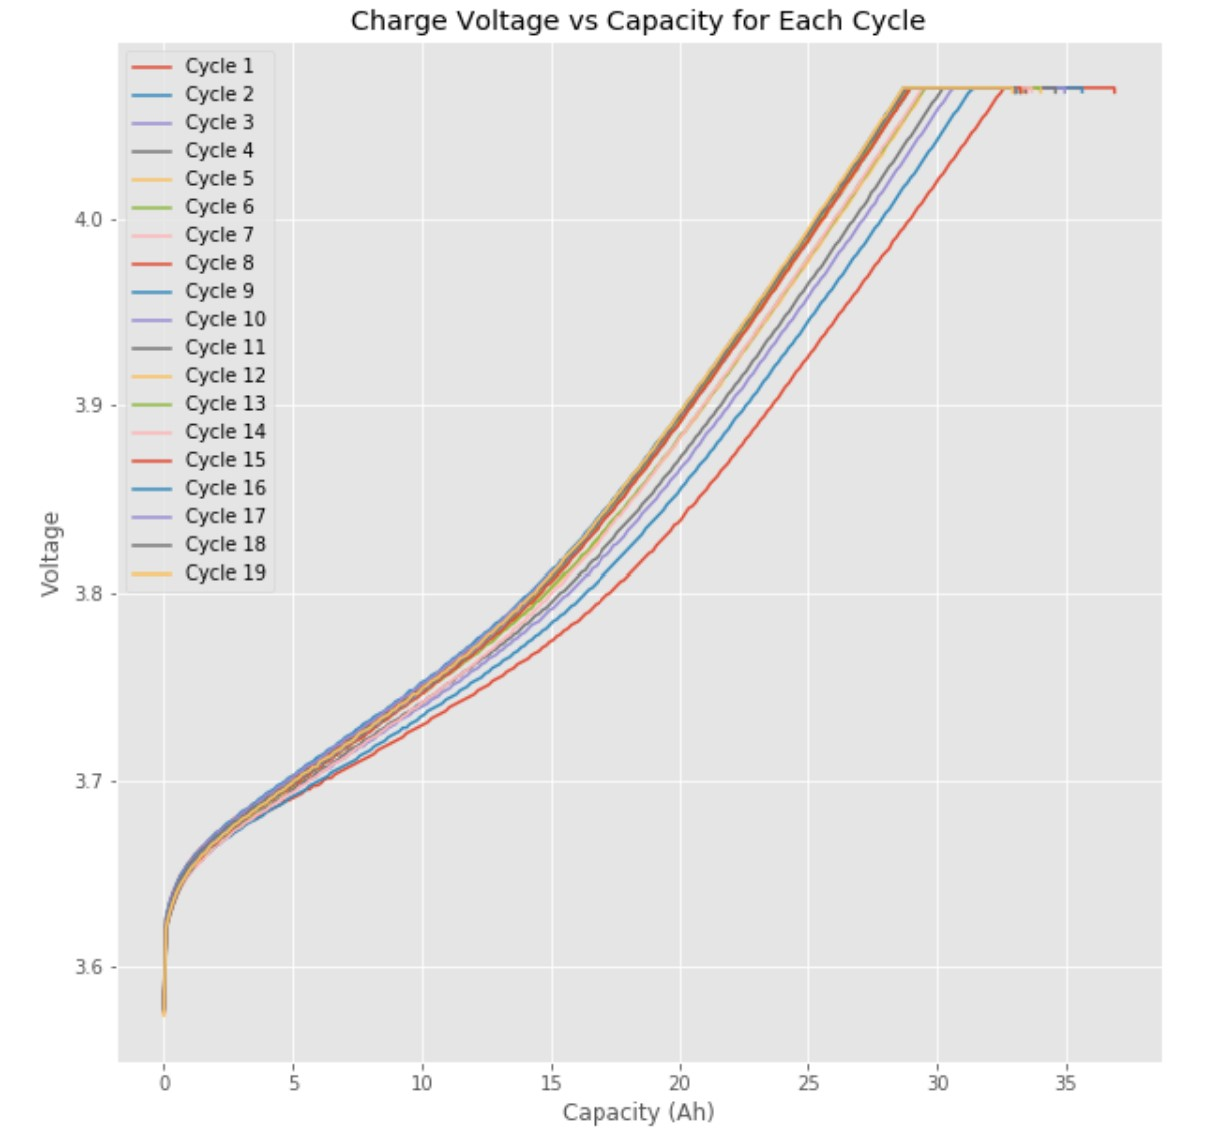
 
 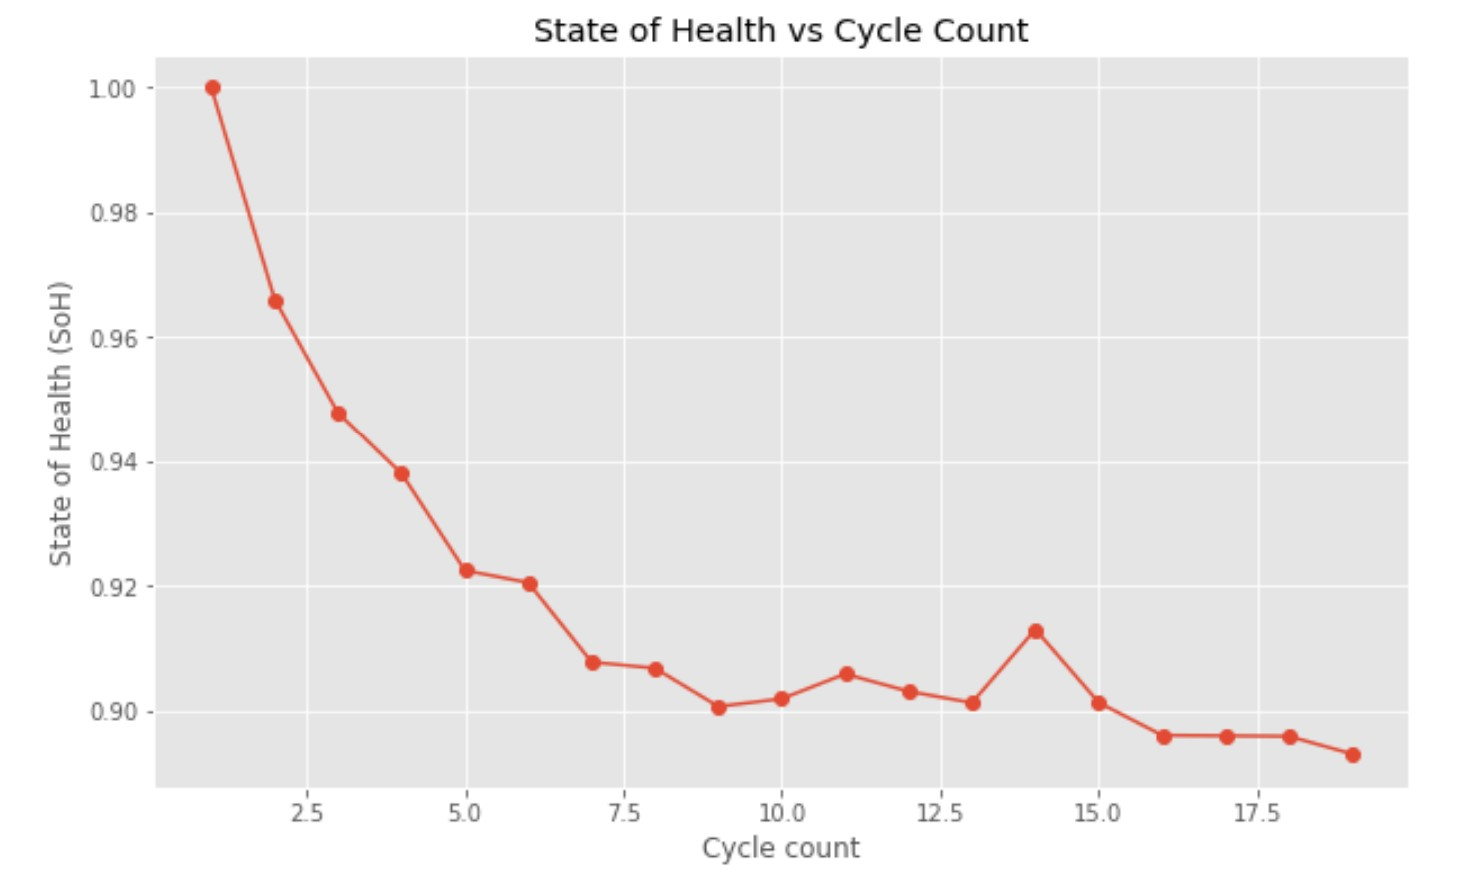
 
 
 From the SOH graph, it is clear to see that ~3% of the batteries health is lost from each charging phase. Without this graph, it is still possible to draw these conclusions from visualizing voltage wrt capacity. While the max voltage stays the same, each consecutive cycle charges to lower and lower capacity, meaning staying at 50 A for less and less time before max charging occurs. The SOH graph was normalized by the first cycle and thus is taking the assumption that the battery was at 100% SOH when the testing started. In reality this is highly unliked as this rapid of degredation would only be observed in either a severely aged battery or one of poor construction with large internal defects.

## Bonus Section

When evaluating battery performance, especially in the context of energy storage and second-life applications, there are several key performance indicators (KPIs) that could be used to assess the state of the batteries.

Here are a few worth noting (skipping basic voltage/current/resistance):

1. **State of Health (SoH)**: This is a measure of the overall condition of a battery compared to its ideal conditions. SoH provides insight into the deterioration and aging of the battery. Factors such as temperature, improper charging/discharging rates, and improper care can excessively decrease a battery's SOH.

2. **Temperature**: Battery temperature can greatly impact battery life and performance. While temperature was not a factor in any of the analysis completed, I have strong laboratory experience with battery cycling with varying temperature. Batteries that operate at temperature extremes can degrade faster than those operating under cooler conditions. 


3. **Cycle Count**: This is the number of complete charge-discharge cycles a battery has undergone. It’s a good indicator of a battery's age, as batteries can only withstand a certain number of charge cycles before their performance begins to degrade. it is crucial when a battery has passed its maximum threshold of cycles. When this amount of cycles has been reached the number of imperfections built up (large internal resistance, lithium plating, dendritic growth, excesive SEI growth, etc) can incite a positive feedback loop culminating in non-linear reduction in SOH with further aging.

4. **Throughput**: The total amount of energy that has been discharged from the battery over its lifetime. Higher throughput can often lead to faster degradation of the battery. This can sometimes be a stronger predictor for the amount of life left in a battery. High volume of mild aging could be less detrimental to the health of the battery than lower volumes of extremely aggressive aging in which the overal throughput would be more despite less cycles.


6. **Charge/Discharge Rates (C-rate)**: It’s a measure of the rate at which a battery is charged or discharged relative to its maximum capacity. Batteries charged or discharged at high C-rates may experience a excesive decrease in overall capacity. For second-life applications this is an extremely valuable indicator of performances. From this analysis we are seeing a battery age aggressively as it is cycled at almost 1C. This same battery may perform much better when cycled at C/5 or C/10. We can use this relationship between SOH reduction and C-rate to have the most stable application of 2nd life batteries - placing sensitive ones in low current demand environments and vice versa.




All these KPIs/indices provide a different lens to view the battery's health and performance, which are crucial in energy storage and second-life applications.

## References
In truth, the current interruption method was new to me and thus, lots of research and many coding iterations occured to achieve the final result. I have included this section to acknowledge those resources.

- Gregory Plett ECE5720: Modeling, Simulation, and Identification of Battery Dynamics Course Materials
    
- MIT equivalent circuit model github - https://github.com/batterysim

- Bin-Hao Chen a, et al. “Establishment of Second-Order Equivalent Circuit Model for Bidirectional Voltage Regulator Converter: 48 V-Aluminum-Ion Battery Pack.” Energy Reports, 30 Jan. 2023, www.sciencedirect.com/science/article/pii/S235248472300094X. 

- Karimi, Danial, et al. “Equivalent Circuit Model for High-Power Lithium-Ion Batteries under High Current Rates, Wide Temperature Range, and Various State of Charges.” MDPI, 1 Feb. 2023, www.mdpi.com/2313-0105/9/2/101. 

- Modeling and State Estimation of Lithium-Ion Battery Packs For ..., uwspace.uwaterloo.ca/bitstream/handle/10012/13268/Mathew_Manoj.pdf?sequence=5. Accessed 7 Aug. 2023.

- Zhu, Jiangong, et al. “Data-Driven Capacity Estimation of Commercial Lithium-Ion Batteries from Voltage Relaxation.” Nature News, 27 Apr. 2022, www.nature.com/articles/s41467-022-29837-w. 